# Bag of Words Meets Bags of Popcorn 

IDMB ÏòÅÌôî Î¶¨Î∑∞Î•º Î°úÎìúÌïòÍ≥† Ï†ïÏ†úÌïòÏó¨ Í∞ÑÎã®Ìïú BOW Î™®Îç∏ÏùÑ Ï†ÅÏö©ÌïòÏó¨ Î¶¨Î∑∞Í∞Ä Ï∂îÏ≤úÏù∏ÏßÄ ÏïÑÎãåÏßÄÏóê ÏòàÏ∏°ÌïòÎäî Í≤ÉÏùò Ï†ïÌôïÎèÑÎ•º ÌôïÏù∏

[kaggle Bag of Words Meets Bags of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial/overview)

[Ï∞∏Í≥†](https://github.com/corazzon/KaggleStruggle/blob/master/word2vec-nlp-tutorial/tutorial-part-1.ipynb)

# ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎìú

In [1]:
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú

In [2]:
 # header=0        ÌååÏùº Ï≤´Î≤àÏß∏ Ï§ÑÏóê Ïó¥ Ïù¥Î¶Ñ Ï°¥Ïû¨ 
 # delimiter='\t'  ÌïÑÎìúÍ∞Ä ÌÉ≠ÏúºÎ°ú Íµ¨Î∂Ñ
 # quoting = 3     ÏåçÎî∞Ïò¥Ìëú Î¨¥Ïãú

# ÌïôÏäµÎç∞Ïù¥ÌÑ∞
train = pd.read_csv('data/labeledTrainData.tsv', 
                    header=0, delimiter='\t', quoting=3)
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞
test = pd.read_csv('data/testData.tsv', 
                    header=0, delimiter='\t', quoting=3)

print(train.shape)
print(test.shape)

(25000, 3)
(25000, 2)


In [3]:
train.head()

id  sentiment                                             review
0  "5814_8"          1  "With all this stuff going down at the moment ...
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...
3  "3630_4"          0  "It must be assumed that those who praised thi...
4  "9495_8"          1  "Superbly trashy and wondrously unpretentious ...

In [4]:
test.head()

id                                             review
0  "12311_10"  "Naturally in a film who's main themes are of ...
1    "8348_2"  "This movie is a disaster within a disaster fi...
2    "5828_4"  "All in all, this is a movie for kids. We saw ...
3    "7186_2"  "Afraid of the Dark left me with the impressio...
4   "12128_7"  "A very accurate depiction of small time mob l...

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      25000 non-null  object
 1   review  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


In [7]:
train["sentiment"].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [8]:
train["review"][0][:1000] # html ÌÉúÍ∑∏Î•º Ï†ïÏ†úÌï¥Ï§Ñ ÌïÑÏöîÍ∞Ä ÏûàÏñ¥Î≥¥ÏûÑ

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

# ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨

In [9]:
# !pip install BeautifulSoup4

In [10]:
!pip show BeautifulSoup4

Name: beautifulsoup4
Version: 4.9.1
Summary: Screen-scraping library
Home-page: http://www.crummy.com/software/BeautifulSoup/bs4/
Author: Leonard Richardson
Author-email: leonardr@segfault.org
License: MIT
Location: e:\anaconda\lib\site-packages
Requires: soupsieve
Required-by: conda-build


## BeautifulSoupÏùÑ ÌÜµÌï¥ htmlÌÉúÍ∑∏ Ï†úÍ±∞

In [11]:
from bs4 import BeautifulSoup

# html ÌÉúÍ∑∏ Ï†úÍ±∞ Ï†Ñ
print(train["review"][0][:1000])

# html ÌÉúÍ∑∏ Ï†úÍ±∞
example1 = BeautifulSoup(train['review'][0], "html5lib")
example1.get_text()[:1000]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 2

## Ï†ïÍ∑úÌëúÌòÑÏãùÏùÑ ÌÜµÌï¥ ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞

In [12]:
import re

# ÏÜåÎ¨∏ÏûêÏôÄ ÎåÄÎ¨∏ÏûêÍ∞Ä ÏïÑÎãå Í≤ÉÏùÄ Í≥µÎ∞±ÏúºÎ°ú ÎåÄÏ≤¥
letters_only = re.sub('[^a-zA-Z]', ' ', example1.get_text())
letters_only[:700]

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

## Î™®Îëê ÏÜåÎ¨∏ÏûêÎ°ú Î≥ÄÌôò

In [13]:
lower_case = letters_only.lower()
lower_case[:700]

' with all this stuff going down at the moment with mj i ve started listening to his music  watching the odd documentary here and there  watched the wiz and watched moonwalker again  maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  some of it has subtle messages about mj s feeling towards the press and also the obvious message of drugs are bad m kay visually impressive but of course this is all about michael jackson so unless you remotely like mj in anyw'

## ÌÜ†ÌÅ∞Ìôî

In [14]:
words = lower_case.split()

print(len(words))
words[:7]

437


['with', 'all', 'this', 'stuff', 'going', 'down', 'at']

## Î∂àÏö©Ïñ¥ Ï†úÍ±∞

In [15]:
# NLTK data ÏÑ§Ïπò
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user7\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [17]:
# stopwords Î•º Ï†úÍ±∞Ìïú ÌÜ†ÌÅ∞
words = [w for w in words if not w in stopwords.words('english')]

print(len(words))
words[:10]

219


['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

## Stemming

In [18]:
# Ï≤òÎ¶¨ Ï†Ñ Îã®Ïñ¥
words[:10]

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

In [19]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
words = [stemmer.stem(w) for w in words]

# Ï≤òÎ¶¨ ÌõÑ Îã®Ïñ¥
words[:10]

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

## Lemmatization

In [20]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

words = [wordnet_lemmatizer.lemmatize(w) for w in words]

# Ï≤òÎ¶¨ ÌõÑ Îã®Ïñ¥
words[:10]

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

# ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ Ìï®ÏàòÌôî

In [21]:
def text_preprocessing(raw_text):
    # HTML Ï†úÍ±∞
    del_tag = BeautifulSoup(raw_text, 'html.parser').get_text()
    
    # ÏòÅÎ¨∏ÏûêÍ∞Ä ÏïÑÎãå Î¨∏ÏûêÎäî Í≥µÎ∞±ÏúºÎ°ú Ï†ÑÌôò
    letters_only = re.sub('[^a-zA-Z]', ' ', del_tag)
    
    # ÏÜåÎ¨∏Ïûê Î≥ÄÌôò Î∞è ÌÜ†ÌÅ∞Ìôî
    words = letters_only.lower().split()
    
    # StopwordsÎ•º Î¶¨Ïä§Ìä∏ÏóêÏÑú ÏÑ∏Ìä∏ ÌòïÌÉúÎ°ú Î≥ÄÌôòÌïòÏó¨ Ï†ÄÏû•
    stops = set(stopwords.words('english'))
    
    # Stopwords Ï†úÍ±∞
    meaningful_words = [w for w in words if not w in stops]
    
    # Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    
    # Í≥µÎ∞±ÏúºÎ°ú Íµ¨Î∂ÑÎêú Î¨∏ÏûêÏó¥Î°ú Í≤∞Ìï©ÌïòÏó¨ Í≤∞Í≥ºÎ•º Î∞òÌôò
    return( ' '.join(stemming_words) ) # join()ÏùÄ Î¶¨Ïä§Ìä∏Î•º ÌäπÏ†ï Íµ¨Î∂ÑÏûêÎ°ú Ìè¨Ìï®Ìï¥ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôòÌï¥Ï£ºÎäî Ìï®Ïàò

In [22]:
# Ìï®Ïàò ÌÖåÏä§Ìä∏
clean_text = text_preprocessing(train['review'][0])
clean_text

'stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obvious messag drug bad kay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl stay

In [24]:
# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤¥ Ï†ÑÏ≤òÎ¶¨
num_reviews = train['review'].size
num_reviews

clean_train_reviews = []

for i in range(0, num_reviews):
    if (i + 1)%5000 == 0:
         print('Review {} of {} '.format(i+1, num_reviews))
    clean_train_reviews.append(text_preprocessing(train['review'][i]))

Review 5000 of 25000 
Review 10000 of 25000 
Review 15000 of 25000 
Review 20000 of 25000 
Review 25000 of 25000 


In [27]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤¥ Ï†ÑÏ≤òÎ¶¨
clean_test_reviews = []

for i in range(0, num_reviews):
    if(i+1) % 5000 == 0:
        print('Review {} of {}' .format(i+1, num_reviews))
    clean_test_reviews.append(text_preprocessing(test['review'][i]))

Review 5000 of 25000
Review 10000 of 25000
Review 15000 of 25000
Review 20000 of 25000
Review 25000 of 25000


In [28]:
# Î©ÄÌã∞ ÌîÑÎ°úÏÑ∏Ïã±
# Ï∞∏Í≥† : https://gist.github.com/yong27/7869662
# http://www.racketracer.com/2016/07/06/pandas-in-parallel/

from multiprocessing import Pool
import numpy as np

def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
    # ÌÇ§ÏõåÎìú Ìï≠Î™© Ï§ë workers ÌååÎùºÎ©îÌÑ∞Î•º Í∫ºÎÉÑ
    workers = kwargs.pop('workers')
    # ÏúÑÏóêÏÑú Í∞ÄÏ†∏Ïò® workers ÏàòÎ°ú ÌîÑÎ°úÏÑ∏Ïä§ ÌíÄÏùÑ Ï†ïÏùò
    pool = Pool(processes=workers)
    # Ïã§ÌñâÌï† Ìï®ÏàòÏôÄ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÏõåÏª§Ïùò Ïàò ÎßåÌÅº ÎÇòÎà† ÏûëÏóÖ
    result = pool.map(_apply_df, [(d, func, kwargs)
            for d in np.array_split(df, workers)])
    pool.close()
    # ÏûëÏóÖ Í≤∞Í≥ºÎ•º Ìï©Ï≥êÏÑú Î∞òÌôò
    return pd.concat(list(result))

In [29]:
# Î©ÄÌã∞ÌîÑÎ°úÏÑ∏Ïã± Î∞©ÏãùÏù¥ ÎÑàÎ¨¥ Ïò§ÎûòÍ±∏Î†§ ÏßÑÌñâÌïòÏßÄÏïäÏùå
# %time clean_train_reviews = apply_by_multiprocessing(train['review'], review_to_words, workers=4)

In [30]:
# time clean_test_reviews = apply_by_multiprocessing(test['review'], review_to_words, workers=4)

# ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú

In [33]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(stopwords = STOPWORDS, 
                          background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

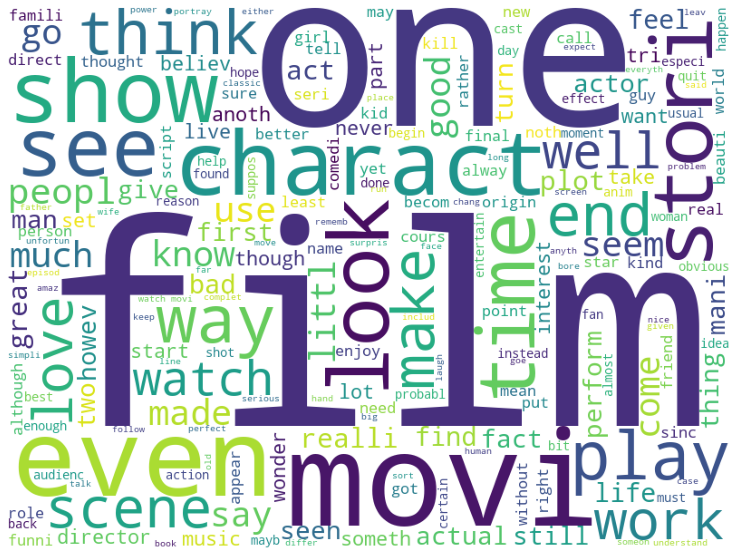

Wall time: 36.2 s


In [34]:
# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò Î™®Îì† Îã®Ïñ¥Ïóê ÎåÄÌïú ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú
%time displayWordCloud(' '.join(clean_train_reviews))

## Îã®Ïñ¥ Î∂ÑÏÑù

In [36]:
train.head()

id  sentiment                                             review
0  "5814_8"          1  "With all this stuff going down at the moment ...
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...
3  "3630_4"          0  "It must be assumed that those who praised thi...
4  "9495_8"          1  "Superbly trashy and wondrously unpretentious ...

In [49]:
x= clean_train_reviews[0]
x= str(x).split() # split()ÏùÄ Î¨∏ÏûêÏó¥ÏùÑ ÌäπÏ†ï Íµ¨Î∂ÑÏûêÎ°ú ÎÇòÎàÑÏñ¥ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôòÌïòÎäî Ìï®Ïàò

print(len(x))
x[:10]

219


['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

In [57]:
# Îã®Ïñ¥ Ïàò 
count_words = lambda x : len(str(x).split()) # def count_words Í∞ôÏùÄ ÎäêÎÇå
train['num_words'] = list(map(count_words, clean_train_reviews)) # map() : Í∞Å ÏöîÏÜåÎì§Ïóê ÌäπÏ†ïÌïú Ìï®ÏàòÎ•º Ï†ÅÏö©ÏãúÌÇ¨ Îïå Ïì∞Îäî Ìï®Ïàò

In [58]:
train.head()

id  sentiment                                             review  \
0  "5814_8"          1  "With all this stuff going down at the moment ...   
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...   
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...   
3  "3630_4"          0  "It must be assumed that those who praised thi...   
4  "9495_8"          1  "Superbly trashy and wondrously unpretentious ...   

   num_words  
0        219  
1         84  
2        240  
3        189  
4        210

In [61]:
# Ï§ëÎ≥µ Îã®Ïñ¥ Ïàò
count_unique_words = lambda x : len(set(str(x).split()))
train['unique_num_words'] = list(map(count_unique_words, clean_train_reviews))

In [62]:
train.head()

id  sentiment                                             review  \
0  "5814_8"          1  "With all this stuff going down at the moment ...   
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...   
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...   
3  "3630_4"          0  "It must be assumed that those who praised thi...   
4  "9495_8"          1  "Superbly trashy and wondrously unpretentious ...   

   num_words  unique_num_words  
0        219               156  
1         84                63  
2        240               201  
3        189               158  
4        210               188

## ÏãúÍ∞ÅÌôî

In [69]:
def get_font_family():
    """
    ÏãúÏä§ÌÖú ÌôòÍ≤ΩÏóê Îî∞Î•∏ Í∏∞Î≥∏ Ìè∞Ìä∏Î™ÖÏùÑ Î∞òÌôòÌïòÎäî Ìï®Ïàò
    """
    import platform
    system_name = platform.system()
    # colab ÏÇ¨Ïö©ÏûêÎäî system_nameÏù¥ 'Linux'Î°ú ÌôïÏù∏

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colabÏóêÏÑúÎäî runtimeÏùÑ <Íº≠> Ïû¨ÏãúÏûë Ìï¥ÏïºÌï©ÎãàÎã§.
        # Îü∞ÌÉÄÏûÑÏùÑ Ïû¨ÏãúÏûë ÌïòÏßÄ ÏïäÍ≥† Ìè∞Ìä∏ ÏÑ§ÏπòÎ•º ÌïòÎ©¥ Í∏∞Î≥∏ ÏÑ§Ï†ï Ìè∞Ìä∏Í∞Ä Î°úÎìúÎêòÏñ¥ ÌïúÍ∏ÄÏù¥ Íπ®ÏßëÎãàÎã§.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

# Í∑∏ÎûòÌîÑ Ïä§ÌÉÄÏùº
plt.style.use("ggplot")

# Ïö¥ÏòÅÏ≤¥Ï†úÏóê ÎßûÎäî Ìè∞Ìä∏ Î∂àÎü¨Ïò§Í∏∞
font_family = get_font_family()

# Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc("font", family= font_family)

# ÎßàÏù¥ÎÑàÏä§ Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc("axes", unicode_minus=False)

# retina display
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

Text(0.5, 1.0, 'Î¶¨Î∑∞Î≥Ñ Í≥†Ïú†Ìïú Îã®Ïñ¥ Ïàò Î∂ÑÌè¨')

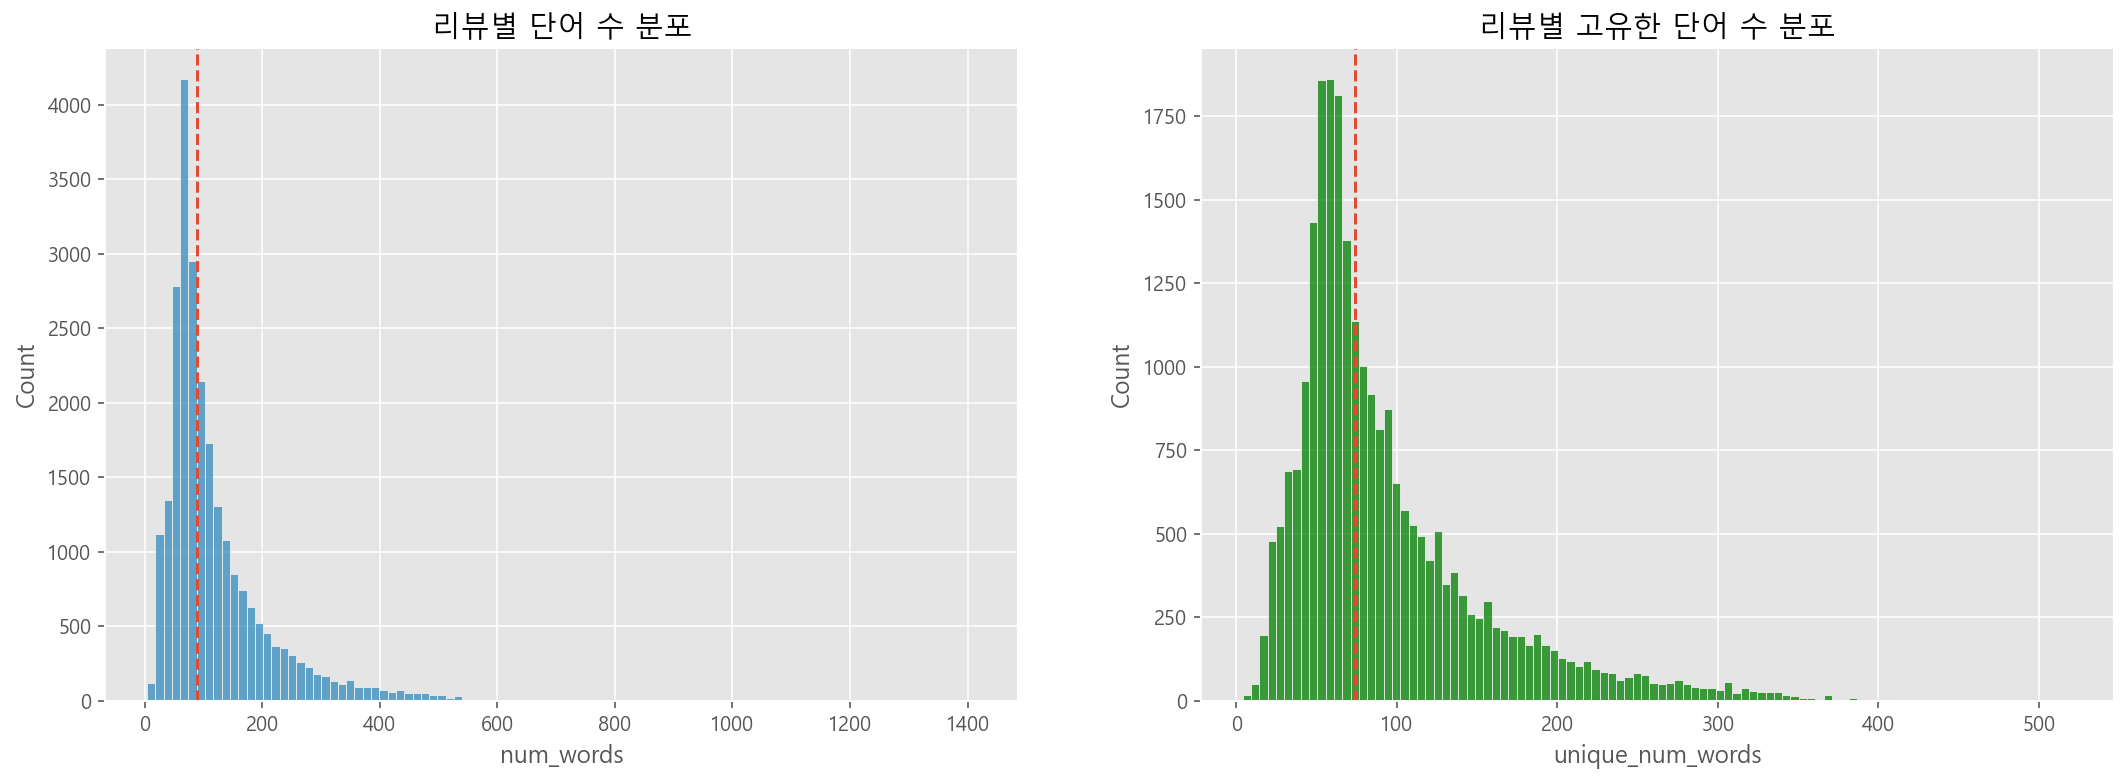

In [70]:
import seaborn as sns

fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(18,6)

sns.histplot(train['num_words'], ax=axes[0], bins=100)
axes[0].axvline(train['num_words'].median(), linestyle='dashed')
axes[0].set_title('Î¶¨Î∑∞Î≥Ñ Îã®Ïñ¥ Ïàò Î∂ÑÌè¨')

sns.histplot(train['unique_num_words'], ax=axes[1], bins=100, color='g')
axes[1].axvline(train['unique_num_words'].median(), linestyle='dashed')
axes[1].set_title('Î¶¨Î∑∞Î≥Ñ Í≥†Ïú†Ìïú Îã®Ïñ¥ Ïàò Î∂ÑÌè¨')

# CounterVectorizer _ ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î≤°ÌÑ∞Ìôî

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2, # ÌÜ†ÌÅ∞Ïù¥ ÎÇòÌÉÄÎÇ† ÏµúÏÜå Î¨∏ÏÑú Í∞úÏàò
                             ngram_range=(1, 3),
                             max_features = 20000)

In [73]:
vectorizer

CountVectorizer(max_features=20000, min_df=2, ngram_range=(1, 3))

In [74]:
# Ïó¨Í∏∞ÏóêÏÑúÎäî ÌïòÎÇòÏùò Í≥ºÏ†ïÎßå Î¨∂Ïñ¥Ï£ºÏñ¥ pipelineÏù¥ Î∂àÌïÑÏöî Ìï† ÏàòÎèÑ ÏûàÎã§
# pipelineÏùÄ feature engineeringÏùò Ïó¨Îü¨ Í≥ºÏ†ïÏùÑ Î¨∂Ïñ¥ Ï§Ñ Îïå ÏÇ¨Ïö©
pipeline = Pipeline([
    ('vect', vectorizer),
])

 fit()Ïù¥ÎûÄ Ï†ïÍ∑úÌôî Ï¶â, ÌÜµÍ≥ÑÏóêÏÑú Ï†ïÍ∑úÎ∂ÑÌè¨Î•º ÎßåÎì§Í≤å ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ùë• Í∞íÏóêÏÑú ÌèâÍ∑†ÏùÑ ÎπºÍ≥† Í∑∏ Í∞íÏùÑ Îã§Ïãú ÌëúÏ§ÄÌé∏Ï∞®Î°ú ÎÇòÎàÑÏñ¥Ï£ºÎäî ÏûëÏóÖÏùÑ ÌïòÎäîÎç∞ Ïù¥ ÏûëÏóÖÏùÑ ÌïòÍ∏∞ ÏúÑÌï¥ **ÌèâÍ∑† ùúáÍ≥º  ÌëúÏ§ÄÌé∏Ï∞® ùúéÎ•º Í≥ÑÏÇ∞ÌïòÎäî ÏûëÏóÖÏù¥ fit()** Ïù¥Í≥†, **transform()ÏùÄ Ï†ïÍ∑úÌôî ÏûëÏóÖÏùÑ Ìï¥Ï£ºÎäî Í≤É**

In [75]:
# ÌïôÏäµÎêú Îç∞Ïù¥ÌÑ∞Î°ú ÌîºÏ≥ê ÏÉùÏÑ±
%time train_data_features = pipeline.fit_transform(clean_train_reviews)
train_data_features

Wall time: 20.2 s


<25000x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 2762315 stored elements in Compressed Sparse Row format>

- ÏÇ¨Ïù¥ÌÇ∑Îü∞Ïóê Íµ¨ÌòÑÎêú Î≤°ÌÑ∞Ìôî ÏïåÍ≥†Î¶¨Ï¶òÏù¥ fitÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú Î≤°ÌÑ∞Ìôî ÌïòÎèÑÎ°ù ÎêòÏñ¥ ÏûàÎã§. Îî∞ÎùºÏÑú RFÏóêÏÑúÏùò fitÍ≥º Î≤°ÌÑ∞ÌôîÏóê ÏÇ¨Ïö©ÎêòÎäî fitÏùÄ Îã§Î•∏ ÏÑ±Í≤©

- cross-validation Í≥º GridSearch Í≥ºÏ†ïÏùÑ ÌïòÎÇòÎ°ú ÎßåÎì§Ïñ¥ Ï£ºÎäîÍ≤å pipelineÏùò Í∞ÄÏû• ÌÅ∞ Ïû•Ï†ê


Ïù¥ ÏΩîÎìúÏóêÎäî cross-validation Í≥º GridSearch Í≥ºÏ†ïÏù¥ ÏóÜÎäîÎç∞ Ìï¥Îãπ Í≥ºÏ†ïÏùÄ Î™®Îç∏Ïùò ÏÑ±Îä•(Ï†ïÌôïÎèÑ)Î•º Ï∏°Ï†ïÌï¥ Î≥¥Îäî Í≥ºÏ†ïÏù¥Í≥†, GridSearchÎäî ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎ©îÌÑ∞Î•º Ï∞æÎäî Í≥ºÏ†ïÏûÑ

In [76]:
train_data_features.shape

(25000, 20000)

In [77]:
# ÌîºÏ≥ê Ïù¥Î¶Ñ Ï∂îÏ∂ú
vocab = vectorizer.get_feature_names()
vocab[:10]

['aag',
 'aaron',
 'ab',
 'abandon',
 'abbey',
 'abbi',
 'abbot',
 'abbott',
 'abc',
 'abduct']

In [79]:
# Î≤°ÌÑ∞ÌôîÎêú ÌîºÏ≥ê ÌôïÏù∏
import numpy as np

dist= np.sum(train_data_features, axis=0)
pd.DataFrame(dist, columns=vocab)

aag  aaron  ab  abandon  abbey  abbi  abbot  abbott  abc  abduct  ...  \
0   26     48  22      288     24    30     29      30  125      55  ...   

   zombi bloodbath  zombi film  zombi flick  zombi movi  zone  zoo  zoom  \
0               23          52           37          89   161   31    71   

   zorro  zu  zucker  
0     59  40      23  

[1 rows x 20000 columns]

In [82]:
# Í∞ÅÍ∞ÅÏùò ÌñâÏù¥ Îã¥Í≥† ÏûàÎäî Îã®Ïñ¥ ÌôïÏù∏
pd.DataFrame(train_data_features.toarray(), columns=vocab).head(10)

aag  aaron  ab  abandon  abbey  abbi  abbot  abbott  abc  abduct  ...  \
0    0      0   0        0      0     0      0       0    0       0  ...   
1    0      0   0        0      0     0      0       0    0       0  ...   
2    0      0   0        0      0     0      0       0    0       0  ...   
3    0      0   0        0      0     0      0       0    0       0  ...   
4    0      0   0        0      0     0      0       0    0       0  ...   
5    0      0   0        0      0     0      0       0    0       0  ...   
6    0      0   0        0      0     0      0       0    0       0  ...   
7    0      0   0        0      0     0      0       0    0       0  ...   
8    0      0   0        0      0     0      0       0    0       0  ...   
9    0      0   0        0      0     0      0       0    0       0  ...   

   zombi bloodbath  zombi film  zombi flick  zombi movi  zone  zoo  zoom  \
0                0           0            0           0     0    0     0   
1                0           0            0           0     0    0     0   
2                0           0            0           0     0    0     0   
3                0           0            0           0     0    0     0   
4                0           0            0           0     0    0     0   
5                0           0            0           0     0    0     0   
6                0           0            0           0     0    0     0   
7                0           0            0           0     0    0     0   
8                0           0            0           0     0    0     0   
9                0           0            0           0     0    0     0   

   zorro  zu  zucker  
0      0   0       0  
1      0   0       0  
2      0   0       0  
3      0   0       0  
4      0   0       0  
5      0   0       0  
6      0   0       0  
7      0   0       0  
8      0   0       0  
9      0   0       0  

[10 rows x 20000 columns]

# ÎûúÎç§Ìè¨Î†àÏä§Ìä∏

In [84]:
!pip install scikit-learn

In [87]:
from sklearn.ensemble import RandomForestClassifier

# ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Î∂ÑÎ•òÍ∏∞Î•º ÏÇ¨Ïö©
forest = RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state=216)
forest

RandomForestClassifier(n_jobs=-1, random_state=216)

In [88]:
forest = forest.fit(train_data_features, train['sentiment'])

In [89]:
from sklearn.model_selection import cross_val_score
score = np.mean(cross_val_score(\
    forest, train_data_features, \
    train['sentiment'], cv=10, scoring='roc_auc'))
score

0.9277986559999999

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°

In [91]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌîºÏ≥ê ÏÉùÏÑ±
test_data_features = pipeline.transform(clean_test_reviews)

In [92]:
result = forest.predict(test_data_features)
result[:10]

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

# Kaggle Ï†úÏ∂úÏö© ÏòàÏ∏° Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•

In [93]:
output = pd.DataFrame(data={'id':test['id'], 'sentiment':result})
output.head()

id  sentiment
0  "12311_10"          1
1    "8348_2"          0
2    "5828_4"          1
3    "7186_2"          1
4   "12128_7"          1

In [94]:
output.to_csv('data/tutorial_1_BOW_{0:.5f}.csv'.format(score), index=False, quoting=3)

In [97]:
output_sentiment = output['sentiment'].value_counts()
output_sentiment 

0    12546
1    12454
Name: sentiment, dtype: int64

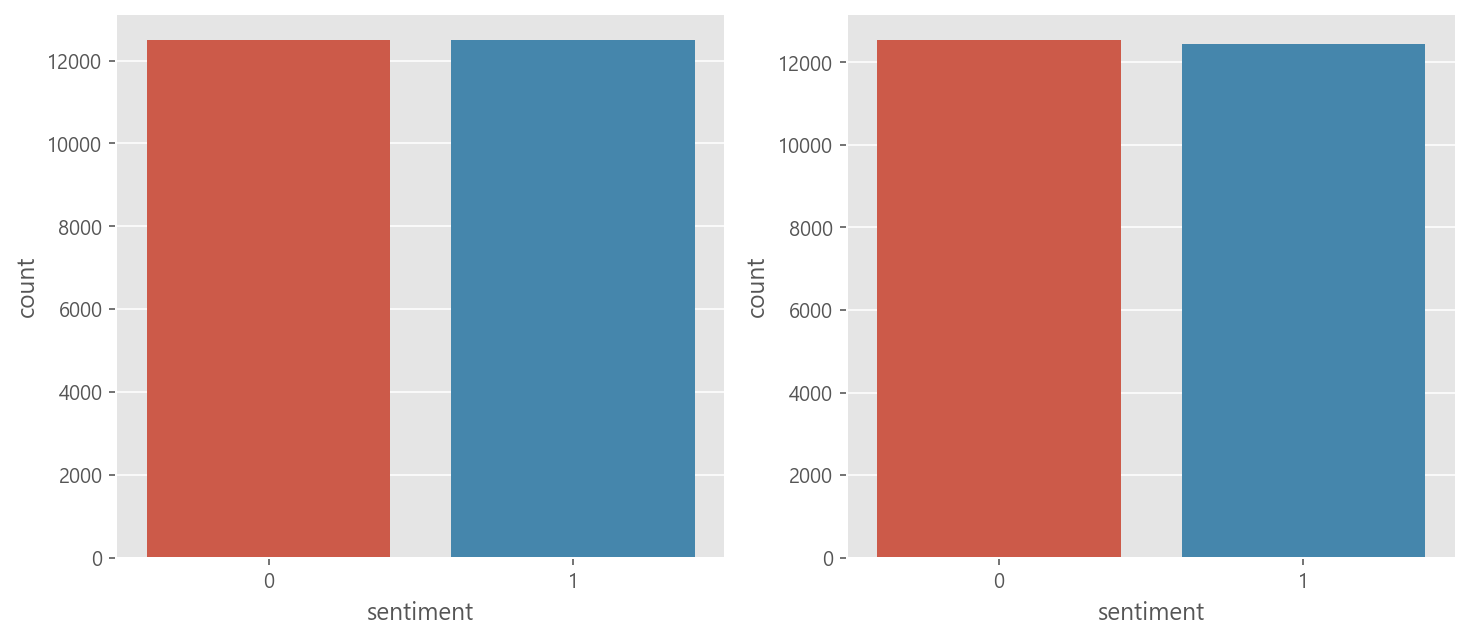

In [99]:
# ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.countplot(x=train['sentiment'], ax=axes[0])
sns.countplot(x=output['sentiment'], ax=axes[1])

kaggle Ï†úÏ∂ú Í≤∞Í≥º 0.85512